In [1]:
import numpy as np
from scipy import stats
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
pd.set_option('max_rows', 5)
%matplotlib inline

## ケーススタディ
---
あるテレビ番組を視聴した人の数を調査したい。ただし、費用は抑えつつ、できるだけ正確な値を求めたい。  
どのような方法があるか考えてみる。

## 母集団と標本
---
知りたいと思う対象の集団全体のことを母集団という。また、平均などその集団の特徴を表す数値を母数という。  
しかし、母集団の**全体を調査するのは困難**であり、母集団の一部を調査して全体を推定することが多い。その調査のために取り出された一部の集団のことを標本という。  
ここで、標本から得られる平均などの統計量は**確率変数**であり、標本を抽出するたびに値が変わる。

<table class="text-center border">
    <tr>
        <th>用語</th>
        <th>内容</th>
        <th>具体例</th>
    </tr>
    <tr>
        <td>母集団 (population)</td>
        <td class="text-left">知りたいと思う対象の集団全体</td>
        <td>日本人全員の身長</td>
    </tr>
    <tr>
        <td>母数 (parameter)</td>
        <td class="text-left">母集団の特徴を表す数値 (平均・分散など)</td>
        <td>日本人の平均身長</td>
    </tr>
    <tr>
        <td>標本 (sample)</td>
        <td class="text-left">母集団から取り出された一部</td>
        <td>日本人100人の身長</td>
    </tr>
    <tr>
        <td>標本抽出 (sampling)</td>
        <td class="text-left">標本を取り出す作業</td>
        <td>日本人100人を選んで身長を測定</td>
    </tr>
    <tr>
        <td>統計量 (statistic)</td>
        <td class="text-left">標本から統計的手法を使って求められる確率変数</td>
        <td>日本人100人の平均身長 (の求め方)</td>
    </tr>
    <tr>
        <td>確率変数 (random variable)</td>
        <td class="text-left">確率分布のみが決まっていて、標本抽出によって初めて値が定まる変数</td>
        <td>サイコロ (一様分布) の出目</td>
    </tr>
</table>

確率変数は慣れないとわかりにくい概念であり、数式中に具体的な値を持つ変数と一緒に登場すると混乱しやすい。

<table class="text-center border">
    <tr>
        <th>確率分布</th>
        <th>標本抽出</th>
        <th>確率変数</th>
        <th>標本</th>
    </tr>
    <tr>
        <td>サイコロ (一様分布)</td>
        <td>サイコロを振る</td>
        <td>サイコロの出目</td>
        <td>(1, 2), (3, 6)</td>
    </tr>
    <tr>
        <td>生徒の学力 (分布は不明)</td>
        <td>テスト</td>
        <td>テストの点数</td>
        <td>(50, 70, 90), (55, 75, 80)</td>
    </tr>
</table>

母数を推定するために標本から求める統計量を推定量 (estimator) と呼ぶ。推定量は確率変数で、標本抽出を行って具体的に求めた値は推定値 (estimate) と呼ぶ。

###### 練習問題

一様分布から 10 サンプルを抽出して標本平均を求める操作を 100 回繰り返した結果をシミュレーションし、サンプリングするごとに標本平均が変わる様子を折れ線グラフにして確かめる。

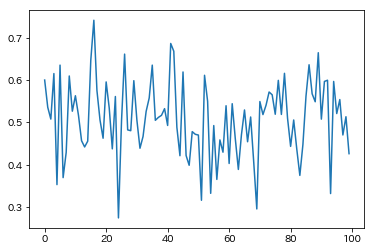

In [2]:
np.random.seed(1234)
sample = 10
reputation = 100
data = np.random.uniform(size=(reputation, sample)).mean(axis=1)
plt.plot(np.arange(data.size), data)
plt.show()

## 二項分布・正規分布の標本平均

###### 練習問題

二項分布から任意の個数のサンプルを抽出して標本平均を求める操作を 10,000 回繰り返した結果をシミュレーションし、得られたデータの分布をヒストグラムで表示する。

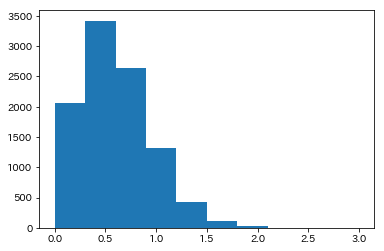

In [3]:
np.random.seed(1234)
n = 5
p = 0.1
sample = 3
reputation = int(1e4)
data = np.random.binomial(n, p, (reputation, sample)).mean(axis=1)
plt.hist(data)
plt.show()

標本平均のような統計量 (確率変数) がしたがう分布を**標本分布**という。  
母分布 (母集団の分布) が、二項分布の標本和・標本平均の分布は二項分布、正規分布の標本和・標本平均の分布は正規分布になることが知られている。

###### 練習問題

正規分布からサンプリングして得た標本平均の分布 (正規化しておく) と母分布を重ねて表示して比較する。

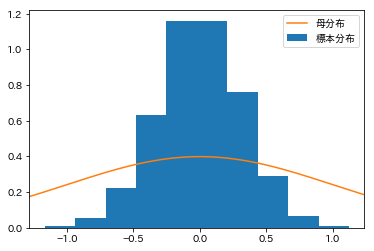

In [4]:
np.random.seed(1234)
sample = 10
reputation = int(1e4)
norm = stats.norm()
data = norm.rvs(size=(reputation, sample)).mean(axis=1)
plt.hist(data, density=True, label='標本分布')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
plt.plot(x, norm.pdf(x), label='母分布')
plt.xlim((xmin, xmax))
plt.legend()
plt.show()

## 中心極限定理 (central limit theorem)
---
二項分布・正規分布以外の分布では、一般に標本和や標本平均の分布が母分布と同じになるわけではない。  
しかし、母分布の形にかかわらず、**サンプルサイズが大きい**ときの**標本和・標本平均**の分布は正規分布に近づくことがわかっている。これを中心極限定理という。 *(証明にはモーメント母関数とテイラー展開を用いる)*  
サンプルサイズについては**少なくとも 30 以上とされることが多い**。

###### 練習問題

中心極限定理が成り立つようにポアソン分布からサンプリングし、標本平均の分布を表示する。

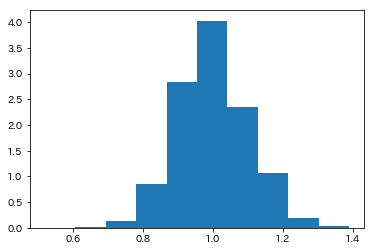

In [5]:
np.random.seed(1234)
sample = 100
reputation = int(1e4)
data = np.random.poisson(size=(reputation, sample)).mean(axis=1)
plt.hist(data, density=True)
plt.show()

###### 練習問題

中心極限定理が成り立つように幾何分布からサンプリングし、標本平均の分布を表示する。

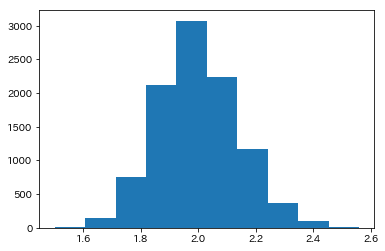

In [6]:
np.random.seed(1234)
sample = 100
reputation = int(1e4)
data = np.random.geometric(0.5, size=(reputation, sample)).mean(axis=1)
plt.hist(data)
plt.show()

###### 練習問題

中心極限定理が成り立つように指数分布からサンプリングし、標本平均の分布を表示する。

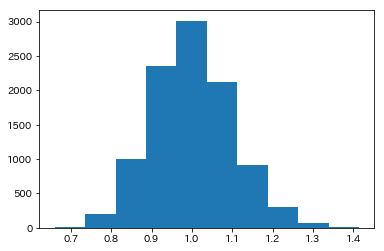

In [7]:
np.random.seed(1234)
sample = 100
reputation = int(1e4)
data = np.random.exponential(size=(reputation, sample)).mean(axis=1)
plt.hist(data)
plt.show()

中心極限定理に基づくと、母平均を $\mu$ ・母標準偏差を $\sigma$ とすると標本平均の分布は $
N\left( \mu ,\ {\displaystyle
    \frac
        {\sigma ^{2}}
        {n}
}\right)
$ に従う。

###### 練習問題

母平均が $10$ ・母標準偏差が $3$ の場合に、 $50$ サンプル抽出して標本平均を求めたときの標本分布をグラフで表示する。

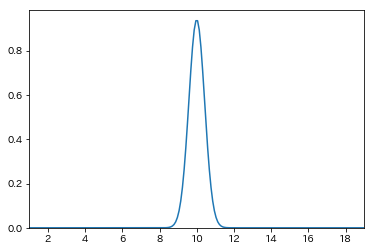

In [8]:
mu = 10
sigma = 3
n = 50
distribution = stats.norm(10, sigma / np.sqrt(n))
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 200)
plt.plot(x, distribution.pdf(x))
plt.xlim((x.min(), x.max()))
plt.ylim((0, plt.ylim()[1]))
plt.show()

### 二項分布の正規分布による近似
---
二項分布は複数回のベルヌーイ試行の和、つまりベルヌーイ分布からの標本和なので、回数が増えていくと中心極限定理によって正規分布で近似できる。

## 不偏分散 (unbiased variance)

###### 練習問題

正規分布から $3$ サンプル抽出して分散 $
\displaystyle \frac
    {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}}
    {n}
$ を求める操作を $100,000$ 回シミュレーションし、得られたデータの平均を求める。

In [9]:
np.random.seed(1234)
sample = 3
reputation = int(1e5)
data = np.random.normal(size=(reputation, sample)).var(axis=1)
print(f'分散の平均 : {data.mean():.3f}')

分散の平均 : 0.668


###### 練習問題

正規分布から $3$ サンプル抽出して $
\displaystyle \frac
    {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}}
    {n-1}
$ を求める操作を $100,000$ 回シミュレーションし、得られたデータの平均を求める。

In [10]:
np.random.seed(1234)
n = 3
reputation = int(1e5)
data = np.random.normal(size=(reputation, n))
var = np.sum((data - data.mean(axis=1, keepdims=True))**2, axis=1) / (n - 1)
print(f'平均 : {var.mean():.3f}')

平均 : 1.002


サンプルから母分散を推定する場合には、サンプルサイズ $n$ ではなく**自由度 $n-1$** で割らないと期待値 (同じ操作を繰り返して平均をとったときに収束していく値) が母分散よりも小さくなってしまう。このように推定量の期待値が母数と一致する性質を不偏性という。  
$n-1$ で割った $
{\displaystyle
    s^{2} =\frac
        {( x_{1} -\mu )^{2} +( x_{2} -\mu )^{2} +\dots +( x_{n} -\mu )^{2}}
        {n-1}
}
$ を不偏分散と呼び、標本分散という場合には不偏分散を指すものとする。

*参考 : [標本分散の不偏性の証明](unbiased_variance.ipynb)*

### Pythonでの不偏分散の求め方
---
`numpy.var`で引数`ddof=1`と指定、`pandas.DataFrame.var`を用いる。

In [11]:
np.random.seed(1234)
array = pd.DataFrame(dict(x=np.random.normal(size=100)))
print('array')
display(array)

array


,x
0,0.471435
1,-1.190976
...,...
98,-1.068989
99,-0.511881


In [12]:
np.var??

In [13]:
array.values.var(ddof=1)

1.0014023446337716

In [14]:
pd.DataFrame.var??

In [15]:
array.var()

x    1.001402
dtype: float64

## 区間推定 (interval estimation)

###### 練習問題

母平均が $5$ ・母分散が $3$ の場合に、 $50$ サンプル抽出して標本平均を求めたときの標本分布の両側 $5\%$ 点を求め、標本分布の確率密度関数でその範囲内に含まれる領域を表示する。

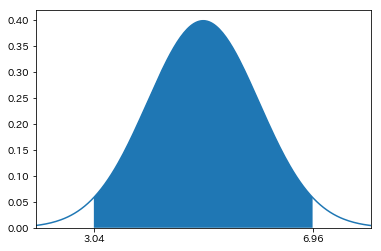

In [16]:
mu = 5
sigma = np.sqrt(3)
sample = 50
p = 0.05
sample_std = sigma / np.sqrt(n)
distribution = stats.norm(mu, sample_std)
left, right = distribution.ppf([p / 2, 1 - p / 2])
x = np.linspace(mu - 3 * sample_std, mu + 3 * sample_std, 200)
interval = np.linspace(left, right, 200)
plt.plot(x, distribution.pdf(x))
plt.fill_between(interval, distribution.pdf(interval))
plt.xlim((x.min(), x.max()))
plt.xticks((left, right))
plt.ylim((0, plt.ylim()[1]))
plt.show()

標本抽出して得た標本平均がどれくらい信頼できるかの指標として、幅をもたせて推定したい場合がある。  
この場合、自由度 $n-1$ の $t$ 分布の両側パーセント点を用いて $
\displaystyle \left(\overline{X} -\frac
    {s}
    {\sqrt{n}}
t_{\frac
    {\alpha }
    {2}
} ,\overline{X} +\frac
    {s}
    {\sqrt{n}}
t_{\frac
    {\alpha }
    {2}
}\right)
$ で求められる。

*参考 : [母平均の区間推定](interval_estimation.ipynb)*

### $t$ 分布
---
互いに独立な確率変数 $Z\sim N(0,\ 1), Y\sim\chi^2(k)$ を使って定義した確率変数 $
t={\displaystyle \frac
    {Z}
    {\sqrt{
        {\displaystyle \frac
            {Y}
            {k}
        }
    }}
}
$ の従う確率分布を自由度 $k$ の $t$ 分布という。

In [17]:
from helpers.population_mean_estimation import t_distribution
t_distribution.show()

interactive(children=(SelectionSlider(continuous_update=False, description='自由度', options=(1, 3, 10, 30, 100),…

### $\chi^2$ (カイ二乗) 分布
---
確率密度関数 $
\begin{gather}
    f(x)=\left(\frac
        {1}
        {2}
    \right)^{\frac
        {k}
        {2}
    }\times\frac
        {x^{\frac
            {k}
            {2}
        -1}
        e^{-\frac
            {x}
            {2}
        }}
        {\begin{gather}
            \int_{0}^{\infty}y^{\frac
                {k}
                {2}
            -1}e^{-y} dy
        \end{gather}}
\end{gather}
$ で表される $f(x)$ を自由度 $k$ の $\chi^2$ 分布という。 (確率密度関数を覚える必要はない)

**確率変数 $X$ が標準正規分布 $N(0,\ 1)$ に従うとすると、確率変数 $\begin{eqnarray}Y=\sum_{i=1}^{k} X_i^2=X_1^2+X_2^2+\dots+X_k^2\end{eqnarray}$ は自由度 $k$ の $\chi^2$ 分布に従う**。

In [18]:
from helpers.population_mean_estimation import chi2_distribution
chi2_distribution.show()

interactive(children=(IntSlider(value=1, continuous_update=False, description='自由度', max=10, min=1), Output())…

### 標準誤差 (standard error)
---
ある推定量の標準偏差 (標本分布の標準偏差) のことを標準誤差という。標本平均 (母平均の推定量) は $
N\left( \mu ,\ {\displaystyle
    \frac
        {\sigma ^{2}}
        {n}
}\right)
$ に従う確率変数であり、その標準誤差、つまり標準偏差 (の推定量) は $
\displaystyle \frac
    {s}
    {\sqrt{n}}
$ で表される。

### Pythonでの標本平均の区間推定の求め方
---
`scipy.stats.t.interval`を用いる。 (標本平均・標準誤差は自分で求める)

In [19]:
np.random.seed(1234)
array = pd.DataFrame(dict(x=np.random.normal(size=100)))
print('array')
display(array)

array


,x
0,0.471435
1,-1.190976
...,...
98,-1.068989
99,-0.511881


In [20]:
stats.t.interval??

In [21]:
alpha = 0.05
df = array.size - 1
mean = array.values.mean()
std = array.values.std(ddof=1)
[
    mean + std / np.sqrt(array.index.size) * t
    for t in stats.t.interval(1 - alpha, df=df)
]

[-0.16344849108303092, 0.23367305733390395]

###### 練習問題

幾何分布から 30 サンプル抽出して、母平均の $95\%$ 信頼区間 (両側 $5\%$ 点の内側) を求める操作を 50 回シミュレーションし、各回の信頼区間を縦棒で並べて表示する。

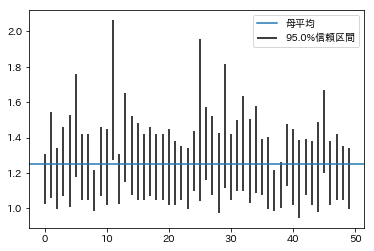

In [22]:
np.random.seed(1234)
sample = 30
reputation = 50
alpha = 0.95
p = 0.8
data = np.random.geometric(p, size=(reputation, sample))
df = sample - 1
mean = data.mean(axis=1)
std = data.std(ddof=1, axis=1)
low, high = np.array(
    [mean + std / np.sqrt(sample) * t for t in stats.t.interval(alpha, df=df)])
plt.vlines(np.arange(reputation), low, high, label=f'{alpha * 100}%信頼区間')
plt.axhline(stats.geom.mean(p=p), label='母平均')
plt.legend()
plt.show()

###### 練習問題

指数分布から 200 サンプル抽出して、母平均の $95\%$ 信頼区間を求める操作を 10,000 回シミュレーションし、得られた信頼区間のうち母平均を範囲内に含むものの割合を求める。

In [23]:
np.random.seed(1234)
sample = 200
reputation = int(1e5)
alpha = 0.95
data = np.random.exponential(size=(reputation, sample))
df = sample - 1
mean = data.mean(axis=1)
std = data.std(ddof=1, axis=1)
low, high = np.array(
    [mean + std / np.sqrt(sample) * t for t in stats.t.interval(alpha, df=df)])
pop = stats.expon.mean()
np.mean((low < pop) & (pop < high))

0.94716